In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/MacounVladimir/UIN/main/peopleinroom.txt', sep=',')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [20]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the day of the week (Monday = 0, Sunday = 6)
df['day_of_week'] = df['date'].dt.dayofweek

# add 1 to shift the day of the week values to be 1-7 (Monday = 1, Sunday = 7)
df['day_of_week'] = df['day_of_week'] + 1

# replace the 'date' column with the 'day_of_week' values
df['date'] = df['day_of_week']

# drop the 'day_of_week' column
df = df.drop('day_of_week', axis=1)

# save the updated data to a new CSV file
df.to_csv('updated_file.csv', index=False)

df.head()
print(df)

      date  Temperature   Humidity       Light          CO2  HumidityRatio  \
1        3      21.7600  31.133333  437.333333  1029.666667       0.005021   
2        3      21.7900  31.000000  437.333333  1000.000000       0.005009   
3        3      21.7675  31.122500  434.000000  1003.750000       0.005022   
4        3      21.7675  31.122500  439.000000  1009.500000       0.005022   
5        3      21.7900  31.133333  437.333333  1005.666667       0.005030   
...    ...          ...        ...         ...          ...            ...   
9748     3      20.8150  27.717500  429.750000  1505.250000       0.004213   
9749     3      20.8650  27.745000  423.500000  1514.500000       0.004230   
9750     3      20.8900  27.745000  423.500000  1521.500000       0.004237   
9751     3      20.8900  28.022500  418.750000  1632.000000       0.004279   
9752     3      21.0000  28.100000  409.000000  1864.000000       0.004321   

      Occupancy  
1             1  
2             1  
3        

Analýza dat

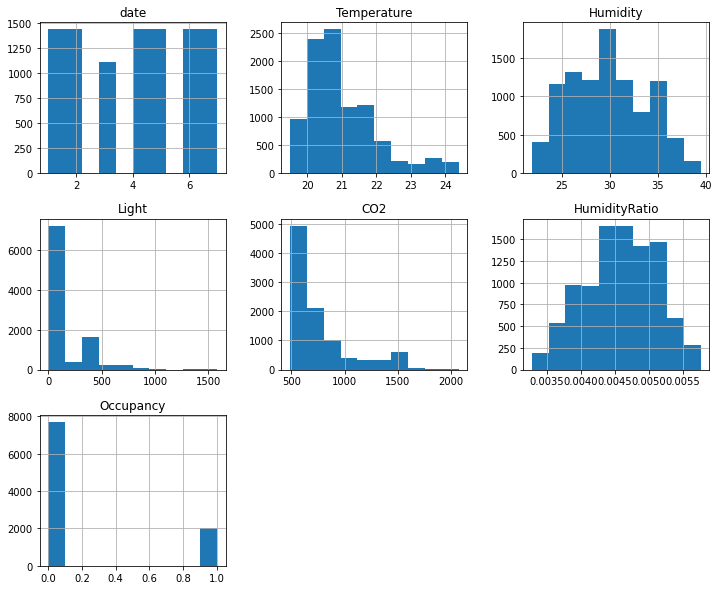

In [21]:
_ = df.hist(figsize=(12,10))

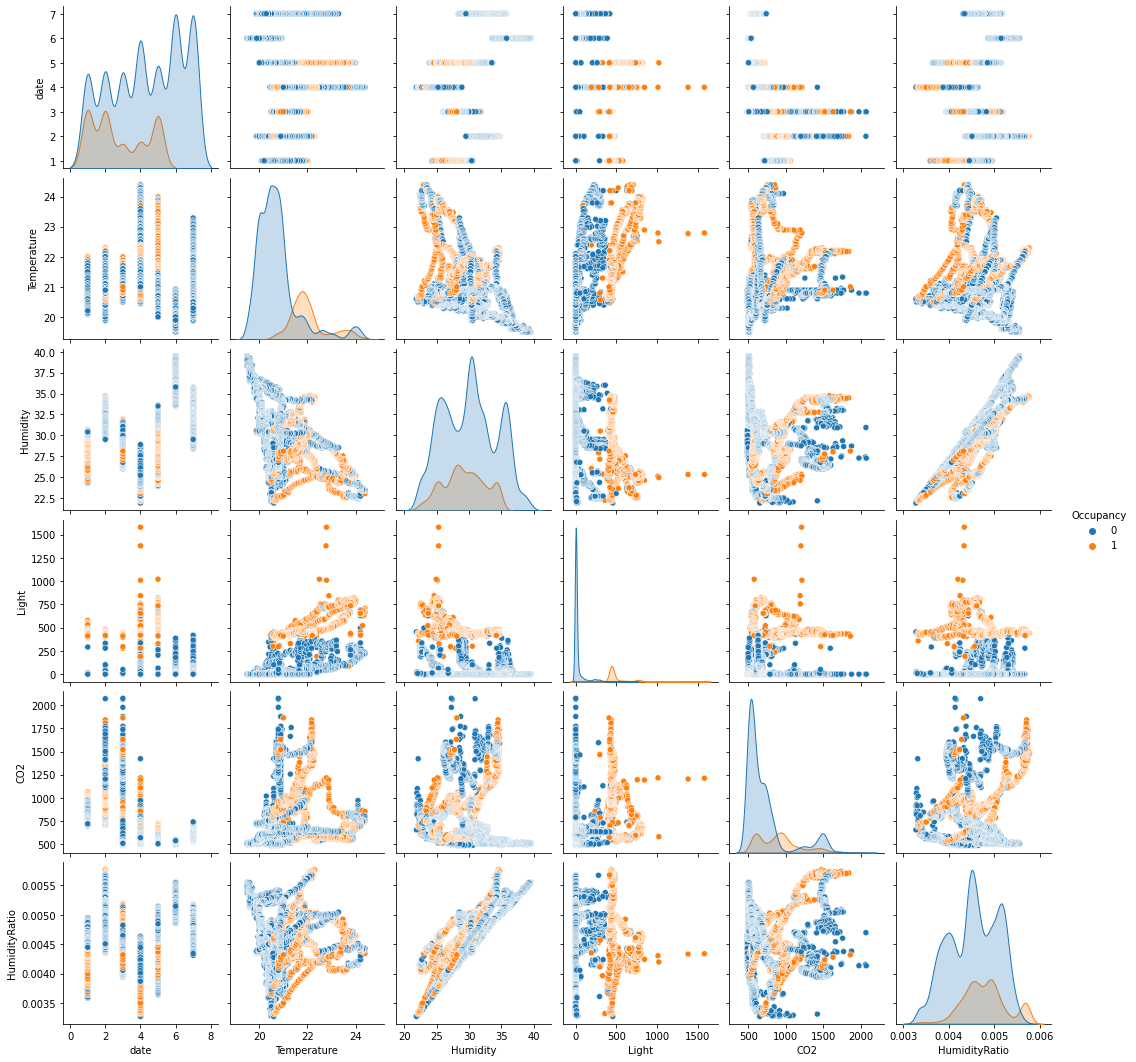

In [22]:
sns.pairplot(df,hue="Occupancy")

<Axes: >

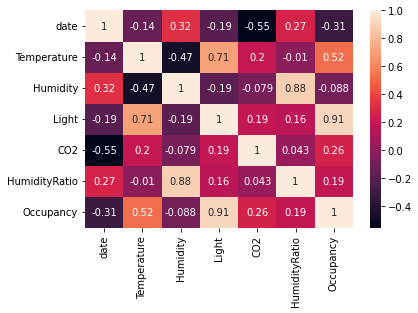

In [23]:
sns.heatmap(df.corr(), annot= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   int64  
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 609.5 KB


In [25]:
df.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,4.033634,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,2.024893,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,1.000000,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,2.000000,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,4.000000,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,6.000000,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,7.000000,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


Příprava dat

In [26]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [27]:
sc = StandardScaler()
x = sc.fit_transform(df.drop("Occupancy", axis=1))
y = df["Occupancy"].values
y_cat = to_categorical(y)

In [28]:
print(x.shape)
print(y_cat.shape)

(9752, 6)
(9752, 2)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=18)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()
model.add(Dense(32, input_shape=(6,), activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [32]:
model.compile(Adam(learning_rate=0.05), loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
244/244 - 2s - loss: 0.0697 - accuracy: 0.9797 - 2s/epoch - 6ms/step
Epoch 2/20
244/244 - 0s - loss: 0.0301 - accuracy: 0.9933 - 348ms/epoch - 1ms/step
Epoch 3/20
244/244 - 0s - loss: 0.0291 - accuracy: 0.9937 - 348ms/epoch - 1ms/step
Epoch 4/20
244/244 - 0s - loss: 0.0276 - accuracy: 0.9941 - 330ms/epoch - 1ms/step
Epoch 5/20
244/244 - 0s - loss: 0.0283 - accuracy: 0.9944 - 343ms/epoch - 1ms/step
Epoch 6/20
244/244 - 0s - loss: 0.0280 - accuracy: 0.9933 - 344ms/epoch - 1ms/step
Epoch 7/20
244/244 - 0s - loss: 0.0272 - accuracy: 0.9941 - 339ms/epoch - 1ms/step
Epoch 8/20
244/244 - 0s - loss: 0.0270 - accuracy: 0.9940 - 349ms/epoch - 1ms/step
Epoch 9/20
244/244 - 0s - loss: 0.0280 - accuracy: 0.9940 - 372ms/epoch - 2ms/step
Epoch 10/20
244/244 - 0s - loss: 0.0276 - accuracy: 0.9944 - 495ms/epoch - 2ms/step
Epoch 11/20
244/244 - 1s - loss: 0.0265 - accuracy: 0.9945 - 530ms/epoch - 2ms/step
Epoch 12/20
244/244 - 1s - loss: 0.0263 - accuracy: 0.9942 - 531ms/epoch - 2ms/step
Epoc

In [35]:
y_test[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

61/61 [==============================] - 0s 1ms/step


In [37]:
y_pred[:5]

array([[9.9997729e-01, 2.2689548e-05],
       [9.9997705e-01, 2.2851607e-05],
       [9.9997669e-01, 2.3276032e-05],
       [9.9992400e-01, 7.5922202e-05],
       [9.9997729e-01, 2.2641951e-05]], dtype=float32)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
accuracy_score(y_test_class, y_pred_class)

0.9958995386981035

In [40]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1533
           1       0.98      1.00      0.99       418

    accuracy                           1.00      1951
   macro avg       0.99      1.00      0.99      1951
weighted avg       1.00      1.00      1.00      1951



In [41]:
confusion_matrix(y_test_class, y_pred_class)

array([[1525,    8],
       [   0,  418]])